In [99]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [100]:
Spec = np.loadtxt('/home/mainak/HE0021-1810_ASCII', unpack=False)

In [101]:
x = Spec[:,0]
y = Spec[:,1]

In [102]:
#ax = plt.axes([0,0,2,2])
#plt.xlim([5260,5290])
#plt.xlabel('Wave Length')
#plt.ylabel('Flux')
#plt.plot(x,y)
#plt.show()


In [103]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [104]:
select = (x>5260) & (x<5290)
print x[select],y[select]
n = len(x[select])
mean = sum(x[select]*y[select])/n
sigma = sum(y[select]*(x[select]-mean)**2)/n

[ 5260.8359375  5262.0859375  5263.3359375  5264.5859375  5265.8359375
  5267.0859375  5268.3359375  5269.5859375  5270.8359375  5272.0859375
  5273.3359375  5274.5859375  5275.8359375  5277.0859375  5278.3359375
  5279.5859375  5280.8359375  5282.0859375  5283.3359375  5284.5859375
  5285.8359375  5287.0859375  5288.3359375  5289.5859375] [ 11.43003368  11.45561218  11.68057251  12.18324471  13.07058048
  14.36092949  16.21694183  18.39595985  20.90534019  24.58959961
  30.75757599  36.97540665  38.35743713  33.74161911  26.10998917
  19.57779312  15.38376331  13.15325546  12.02444553  11.38606739
  10.91779804  10.71107388  10.44461536  10.38135147]


In [105]:
def gaus(wave, amp1, cent1, sigma1,c):
    return amp1*exp(-(wave-cent1)**2/(2*sigma1**2)) +  c

In [109]:
def gaus2(wave, amp1, amp2, cent1, cent2, sigma1, sigma2, c):
    return amp1*exp(-(wave-cent1)**2/(2*sigma1**2)) + amp2*exp(-(wave-cent2)**2/(2*sigma2**2)) + c
def gaus2_wo(wave, amp1, amp2, cent1, cent2, sigma1, sigma2):
    return amp1*exp(-(wave-cent1)**2/(2*sigma1**2)) + amp2*exp(-(wave-cent2)**2/(2*sigma2**2))

In [110]:
#print mean, sigma
#popt,pcov = curve_fit(gaus,x[select],y[select],p0=[1.0,5260,10.0,20.0])
#print popt,pcov

In [111]:
print mean, sigma
popt2,pcov2 = curve_fit(gaus2,x[select],y[select],p0=[1.0,1.0,5260,5260,10.0,10.0,20.0])
print popt2,pcov2

95434.7485813 147067130212.0
[  1.78743490e+01   1.08770939e+01   5.27574929e+03   5.27383049e+03
   2.13377027e+00   4.76472548e+00   1.05852781e+01] [[  3.48673030e-01  -3.21198118e-01  -8.81508366e-03  -5.98477546e-02
    2.27865910e-02   5.55998409e-02  -1.75948674e-02]
 [ -3.21198118e-01   3.37299761e-01   9.36870702e-03   5.69801988e-02
   -2.58628878e-02  -5.01120180e-02   6.04675644e-03]
 [ -8.81508366e-03   9.36870702e-03   1.50757966e-03  -1.59253339e-04
   -5.46789943e-04  -3.79399238e-03   2.03023308e-03]
 [ -5.98477546e-02   5.69801988e-02  -1.59253339e-04   1.63407053e-02
   -4.78144386e-03  -6.14718762e-03   5.45472115e-04]
 [  2.27865910e-02  -2.58628878e-02  -5.46789943e-04  -4.78144386e-03
    2.68553556e-03   3.22828535e-03  -6.38122516e-04]
 [  5.55998409e-02  -5.01120180e-02  -3.79399238e-03  -6.14718762e-03
    3.22828535e-03   2.13961452e-02  -1.37611656e-02]
 [ -1.75948674e-02   6.04675644e-03   2.03023308e-03   5.45472115e-04
   -6.38122516e-04  -1.37611656e-02

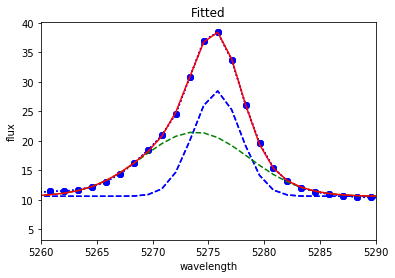

In [74]:
#ax = plt.axes([0,0,2,2])
#plt.xlim([5260,5290])
#plt.plot(x,y, 'bo:',label='data')
#plt.plot(x,gaus(x,*([popt2[0],popt2[2],popt2[4],popt2[6]])),'b--')
#plt.plot(x,gaus(x,*([popt2[1],popt2[3],popt2[5],popt2[6]])),'g--')
#plt.plot(x,gaus2(x,*popt2),'r-',label='fit')
#plt.legend
#plt.title('Fitted')
#plt.xlabel('wavelength')
#plt.ylabel('flux')
#plt.show()

9.58000000021
7.62000000017


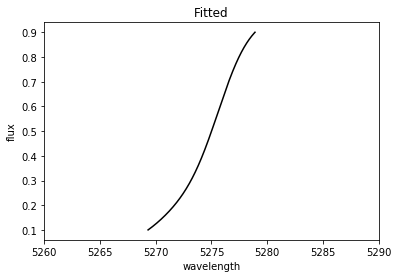

In [89]:
#ax = plt.axes([0,0,2,2])
plt.xlim([5260,5290])
wave = np.arange(5200,5400,0.02)
#plt.plot(x,y, 'bo:',label='data')
#plt.plot(x,gaus1(x,*([popt3[0],popt3[2],popt3[4],popt3[6]])),'b--')
#plt.plot(x,gaus1(x,*([popt3[1],popt3[3],popt3[5],popt3[6]])),'g--')
#plt.plot(wave,gaus3(wave,*popt3),'r-',label='fit')
cor_popt2 = np.array(popt2)
cor_popt2[4] = np.sqrt(cor_popt2[4]**2-(2.5/2.354)**2)
cor_popt2[5] = np.sqrt(cor_popt2[5]**2-(2.5/2.354)**2)
cumsum = np.cumsum(gaus2_wo(wave,*cor_popt2[:-1]))
norm_sum=cumsum/cumsum[-1]
select = (norm_sum>0.1) & (norm_sum<0.9)
w80 = wave[select][-1]-wave[select][0]
print w80
plt.plot(wave[select],norm_sum[select],'-k')
select =  (norm_sum>0.05) & (norm_sum<0.5)
v5 = wave[select][-1]-wave[select][0]
print v5        
plt.legend
plt.title('Fitted')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.show()


In [91]:
z = 0.414757
c = 3*(10**10)
w80_actual = ((w80)/5007)*(c/(1+z))
w80_actual
#this is in cm/s

40572084.467189975

In [75]:
F_total = (2.507*(popt2[0]*popt2[4]) + 2.507*(popt2[1]*popt2[5]))*(10**-16)
F_total

2.2554506554781072e-14

In [76]:
F_narrow = 2.507*(popt2[0]*popt2[4])*(10**-16)
F_narrow

9.561636434104476e-15

In [77]:
F_broad = 2.507*(popt2[1]*popt2[5])*(10**-16)
F_broad

1.2992870120676599e-14

In [78]:
D_L = 7.0*(10**27)

In [79]:
L_total = 31.5*((D_L)**2)*(F_total)/(2.507)
L_total

1.3886270788713438e+43

In [80]:
L_narrow = 31.5*((D_L)**2)*(F_narrow)/(2.507)
L_narrow

5.8868710953491268e+42

In [81]:
L_broad = 31.5*((D_L)**2)*(F_broad)/(2.507)
L_broad

7.9993996933643123e+42

In [84]:
z = 0.414757
c = 3*(10**10)
velshift_angstrom = popt2[2]- popt2[3]
velshift_angstrom

1.9188023153274116

In [86]:
velshift_actual = ((velshift_angstrom)/popt2[3])*(c/(1+z))
velshift_actual

7715133.9500061814